Aravind Patnam
Jeremy Tan
Timothy Le

CSE-184 Final Project - Trending Here Trending There 
An analysis on trending and nontrending Youtube videos. 

In [3]:
import scripts.scripts as script
%run "scripts/imports.py"

[nltk_data] Downloading package wordnet to /Users/aravind/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
## written by Aravind Patnam and Jeremy Tan
#### get all csv dataframes for trending. These files should be in the same directory. 
US_trending_df = pd.read_csv('data/USvideos.csv') #USA
CA_trending_df = pd.read_csv('data/CAvideos.csv') #CANADA
DE_trending_df = pd.read_csv('data/DEvideos.csv') #GERMANY
FR_trending_df = pd.read_csv('data/FRvideos.csv') #FRANCE
GB_trending_df = pd.read_csv('data/GBvideos.csv') #GREAT BRITAIN
IN_trending_df = pd.read_csv('data/INvideos.csv') #INDIA
JP_trending_df = pd.read_csv('data/JPvideos.csv', encoding='ISO-8859-1') #JAPAN
KR_trending_df = pd.read_csv('data/KRvideos.csv' , encoding='ISO-8859-1') #SOUTH KOREA
MX_trending_df = pd.read_csv('data/MXvideos.csv', encoding='ISO-8859-1') #MEXICO
RU_trending_df = pd.read_csv('data/RUvideos.csv', encoding='ISO-8859-1') #RUSSIA

list_of_all_trending_dfs = [US_trending_df, CA_trending_df, DE_trending_df, FR_trending_df, GB_trending_df, IN_trending_df,
                           JP_trending_df, KR_trending_df, MX_trending_df, RU_trending_df]
list_of_csvs = ['data/USvideos.csv','data/CAvideos.csv', 'data/DEvideos.csv', 'data/FRvideos.csv', 'data/GBvideos.csv', 'data/INvideos.csv', 'data/JPvideos.csv','data/KRvideos.csv', 'data/MXvideos.csv', 'data/RUvideos.csv' ]

big_df = list()
for csv in list_of_csvs:
    # use encoding to bypass utf error
    df = pd.read_csv(csv, index_col='video_id', encoding='ISO-8859-1')
    # add new column called "country" to indentify which videos the csv are coming from
    # depending on your path name, this will break as it looks at the path name 
    df['country'] = csv[0:2]
    big_df.append(df)
    
full_trending_df = pd.concat(big_df)
full_trending_df.tail()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
OMmR9THjVKM,18.14.06,Ð£ Ð¼ÐµÐ½Ñ Ð¡ÐÐÐ! (Story booth Ð½Ð° ÑÑÑ...,Pastime Time,22,2018-06-13T13:47:01.000Z,"story booth Ð½Ð° ÑÑÑÑÐºÐ¾Ð¼|""story booth Ð...",129488,5893,164,990,https://i.ytimg.com/vi/OMmR9THjVKM/default.jpg,False,False,False,ÐÐ¾ÑÐ¸ÐºÐ¸ Ð² Blade and Soul - https://bit.l...,da
tX7p7NtNVDE,18.14.06,ÐÐ¾Ð¸ ÐÐµÑÑÐºÐ¸Ðµ Ð¢ÑÐ°Ð²Ð¼Ñ 2 (Ð°Ð½Ð¸Ð¼...,CaGArt,23,2018-06-12T09:38:38.000Z,"ÐºÐ°Ð³Ð°ÑÑ|""ÐºÐ°Ð³Ð¸""|""ÑÐ°Ð³Ð°ÑÑ""|""Ð³Ð°Ð³...",99163,4659,337,692,https://i.ytimg.com/vi/tX7p7NtNVDE/default.jpg,False,False,False,ÐÐ¾Ð¸ ÐÐµÑÑÐºÐ¸Ðµ Ð¢ÑÐ°Ð²Ð¼Ñ 2 (Ð°Ð½Ð¸Ð¼...,da
KAyj5Xm1C64,18.14.06,[ENG SUB] BTS PROM PARTY 2018 Intro + 2nd Gran...,DaisyxBTS 07,24,2018-06-13T12:51:23.000Z,[none],449611,24808,93,974,https://i.ytimg.com/vi/KAyj5Xm1C64/default.jpg,False,False,False,***I do NOT own anything. Just want to share t...,da
4PiSLIrsSiY,18.14.06,ÐÐÐÐÐ ÐÐÐÐÐÐ ÐÐÐÐÐÐ¢Ð«ð/Ð¢Ð...,ÐÑÑÑÐ° ÐÐµÐ±ÐµÐ´ÐµÐ²Ð°,22,2018-06-13T00:23:33.000Z,"ÑÑÐ¼ ÑÑÑ Ð²Ð°Ð½Ð½Ð¾Ð¹ ÐºÐ¾Ð¼Ð½Ð°ÑÑ|""roo...",14225,793,39,209,https://i.ytimg.com/vi/4PiSLIrsSiY/default.jpg,False,False,False,"ÐÐ±Ð·Ð¾Ñ Ð²Ð°Ð½Ð½Ð¾Ð¹ ÐºÐ¾Ð¼Ð½Ð°ÑÑ, ÑÑÐ°...",da
Ehy5foVfKOE,18.14.06,ÐÐ»Ð¾Ñ Ð¾Ð¹ ÑÐ¸Ð³Ð½Ð°Ð». Ð¡ÑÐ°Ð½Ñ ÑÐµÐ»Ð¾...,Tubus Show,29,2018-06-13T09:50:09.000Z,"Ð¿Ð»Ð¾Ñ Ð¾Ð¹ ÑÐ¸Ð³Ð½Ð°Ð»|""ÑÑÐ±ÑÑ ÑÐ¾Ñ""|...",52340,7708,133,1819,https://i.ytimg.com/vi/Ehy5foVfKOE/default.jpg,False,False,False,Ð 90-Ñ Ð³Ð¾Ð´Ð°Ñ Ð¿ÑÐ¾ÑÐ»Ð¾Ð³Ð¾ Ð²ÐµÐºÐ° ...,da


In [3]:
#### reformatting and detecting nans

# reformat trending_date
full_trending_df['trending_date'] = pd.to_datetime(full_trending_df['trending_date'],errors='coerce', format='%y.%d.%m')
full_trending_df['publish_time'] = pd.to_datetime(full_trending_df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

# detects any nans 
full_trending_df = full_trending_df[full_trending_df['trending_date'].notnull()]
full_trending_df = full_trending_df[full_trending_df['publish_time'].notnull()]

# drop all nans by trmeoving them 
full_trending_df = full_trending_df.dropna(how='any',inplace=False, axis = 0)

# this is done already so don't run it twice
full_trending_df.insert(4, 'publish_date', full_trending_df['publish_time'].dt.date)
full_trending_df['publish_time'] = full_trending_df['publish_time'].dt.time

# set index by video id and sort by trending dates 
full_trending_df_fill = full_trending_df.reset_index().sort_values('trending_date').set_index('video_id')
# set index by vide id and sort by trending dates, but make sure to drop duplicates
full_trending_df = full_trending_df.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='last').set_index('video_id')
# videos[['publish_date','publish_time']].head()
full_trending_df.head()

,trending_date,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,,
GSid9wlRqBQ,2017-11-14,Julien Bam reagiert auf HATE Kommentare (zum a...,Julien Bam,24,2017-11-11,11:00:02,"Julien|""Bam""|""Hate""|""Kommentare""|""Reagieren""|""...",1186759,134977,5704,18549,https://i.ytimg.com/vi/GSid9wlRqBQ/default.jpg,False,False,False,"Das ist das erste Mal, dass ich auf Hate Komme...",da
KNq8laLAqcc,2017-11-14,à¹à¸à¸­à¸à¸·à¸­à¸à¸£à¸«à¸¡à¸¥à¸´à¸à¸´à¸ ...,one31,24,2017-11-13,14:51:22,[none],363046,1375,70,166,https://i.ytimg.com/vi/KNq8laLAqcc/default.jpg,False,False,False,#à¹à¸à¸­à¸à¸·à¸­à¸à¸£à¸«à¸¡à¸¥à¸´à¸à¸´à¸...,da
j8h7KEGcswk,2017-11-14,Engel 11:11 Portal Orakel fÃ¼r die Woche vom 1...,DasEngelOrakel,1,2017-11-12,09:33:38,[none],13363,336,20,36,https://i.ytimg.com/vi/j8h7KEGcswk/default.jpg,False,False,False,www.engel-geistheilung.de // Entscheidende Tr...,da
5MYXzKS95XY,2017-11-14,Denunziantentum heiÃt jetzt Zivilcourage,Achgut.Pogo,25,2017-11-13,14:03:52,"Gerald Hensel|""Scholz & Friends""|""Kein Geld fÃ...",6051,526,8,58,https://i.ytimg.com/vi/5MYXzKS95XY/default.jpg,False,False,False,Vor etwa einem Jahr versuchte ein Mitarbeiter ...,da
_UEk3WRixnc,2017-11-14,Bodybuilder bekommen Platzwunden - Paintball C...,HARDGAINER CREW,17,2017-11-13,20:10:36,"hardcore bodybuilding|""hardgainer crew""|""hardg...",31500,3122,28,192,https://i.ytimg.com/vi/_UEk3WRixnc/default.jpg,False,False,False,Bekommen Bodybuilder Platzwunden? Hardgainer C...,da


In [4]:
## written by Aravind Patnam

## run these to get the non trending datasets generated from the youtube api. These files should be in the same directory
not_trending_us_df = pd.read_csv('data/not_trending_us_df.csv')
not_trending_ca_df = pd.read_csv('data/not_trending_ca_df.csv')
not_trending_de_df = pd.read_csv('data/not_trending_de_df.csv')
not_trending_fr_df = pd.read_csv('data/not_trending_fr_df.csv')
not_trending_gb_df = pd.read_csv('data/not_trending_gb_df.csv')
not_trending_in_df = pd.read_csv('data/not_trending_in_df.csv')
not_trending_jp_df = pd.read_csv('data/not_trending_jp_df.csv')
not_trending_kr_df = pd.read_csv('data/not_trending_kr_df.csv')
not_trending_mx_df = pd.read_csv('data/not_trending_mx_df.csv')
not_trending_ru_df = pd.read_csv('data/not_trending_ru_df.csv')

In [ ]:
## written by Aravind Patnam
### do not run this unless you have a lot of time and 10 Youtube API keys!!!. Datasets are already generated for you for testing. 
n = 50
US_trending_videoIds = US_trending_df.sample(n)['video_id'].tolist()
CA_trending_videoIds = CA_trending_df.sample(n)['video_id'].tolist()
DE_trending_videoIds = DE_trending_df.sample(n)['video_id'].tolist()
FR_trending_videoIds = FR_trending_df.sample(n)['video_id'].tolist()
GB_trending_videoIds = GB_trending_df.sample(n)['video_id'].tolist()
IN_trending_videoIds = IN_trending_df.sample(n)['video_id'].tolist()
JP_trending_videoIds = JP_trending_df.sample(n)['video_id'].tolist()
KR_trending_videoIds = KR_trending_df.sample(n)['video_id'].tolist()
MX_trending_videoIds = MX_trending_df.sample(n)['video_id'].tolist()
RU_trending_videoIds = RU_trending_df.sample(n)['video_id'].tolist()

## written by Aravind Patnam
### do not run this unless you have a lot of time and 10 Youtube API keys!!! Datasets are already generated for you for testing. 
## do following requests separately with a new API Key and have the file called "apiKey"
not_trending_us_df = script.process_youtube_requests(US_trending_videoIds)
not_trending_ca_df = script.process_youtube_requests(CA_trending_videoIds)
not_trending_de_df = script.process_youtube_requests(DE_trending_videoIds)
not_trending_fr_df = script.process_youtube_requests(FR_trending_videoIds)
not_trending_gb_df = script.process_youtube_requests(GB_trending_videoIds)
not_trending_in_df = script.process_youtube_requests(IN_trending_videoIds)
not_trending_jp_df = script.process_youtube_requests(JP_trending_videoIds)
not_trending_kr_df = script.process_youtube_requests(KR_trending_videoIds)
not_trending_mx_df = script.process_youtube_requests(MX_trending_videoIds)
not_trending_ru_df = script.process_youtube_requests(RU_trending_videoIds)

In [5]:
## written by Aravind Patnam

## puts all nontrending and all dfs that we have together for one big df and multiple smaller ones
list_of_all_nontrending_dfs = [not_trending_us_df, not_trending_ca_df, not_trending_de_df, 
                              not_trending_fr_df, not_trending_gb_df, not_trending_in_df, not_trending_jp_df,
                              not_trending_kr_df, not_trending_mx_df, not_trending_ru_df]


full_nontrending_df = pd.concat(list_of_all_nontrending_dfs)
allDfsList = list_of_all_trending_dfs + list_of_all_nontrending_dfs + [full_trending_df] + [full_nontrending_df]
allDfsDf = pd.concat(allDfsList)
allDfsList.append(allDfsDf)

## written by Jeremy Tan
## insert new category field into dataframes
for df in allDfsList:
    script.insert_category_field(df)

## written by Jeremy Tan

## converts all columns in dataframes to type for analysis
for df in list_of_all_nontrending_dfs:
    df['video_id'] = df['video_id'].astype(str) 
    df['title'] = df['title'].astype(str)
    df['channel_title'] = df['channel_title'].astype(str)
    df['category_id'] = df['category_id'].astype(int)
    df['category'] = df['category'].astype(str)
    df['tags'] = df['tags'].astype(str)
    df['views'] = df['views'].astype(int)
    df['likes'] = df['likes'].astype(int)
    df['dislikes'] = df['dislikes'].astype(int)
    df['comment_count'] = df['comment_count'].astype(int)
    df['description'] = df['description'].astype(str)

In [6]:
## written by Aravind Patnam

## output is a map containing all the numeric data for each df
describes = []
for df in allDfsList:
    describes.append(script.find_stats(df))
describesKeys = ['US_trending_df', 'CA_trending_df', 'DE_trending_df', 'FR_trending_df', 'GB_trending_df',
                'IN_trending_df', 'JP_trending_df', 'KR_trending_df', 'MX_trending_df', 'RU_trending_df',
                 'not_trending_us_df', 'not_trending_ca_df', 'not_trending_de_df', 'not_trending_fr_df',
                'not_trending_gb_df', 'not_trending_in_df', 'not_trending_jp_df', 'not_trending_kr_df',
                 'not_trending_mx_df', 'not_trending_ru_df',
                'full_trending_df', 'full_nontrending_df', 'allDfsDf']
describeMap = dict(zip(describesKeys, describes))
## make sense of each data point we have from the describeMap and clean it for visualization
countries = list(describeMap.keys())

## written by Aravind Patnam
likes_count, dislikes_count = script.do_describe_analysis(describeMap, countries, describesKeys)

Loading BokehJS ...

In [7]:
script.do_likes_to_dislikes_analysis(likes_count, dislikes_count, countries)

Loading BokehJS ...

In [8]:
## written by Aravind Patnam

## a bunch of maps containing the most popular tags for each country that are both trending and not trending and their frequency
us_trending_most_common_tags = script.get_most_common_tags(US_trending_df)
ca_trending_most_common_tags = script.get_most_common_tags(CA_trending_df)
de_trending_most_common_tags = script.get_most_common_tags(DE_trending_df)
fr_trending_most_common_tags = script.get_most_common_tags(FR_trending_df)
gb_trending_most_common_tags = script.get_most_common_tags(GB_trending_df)
in_trending_most_common_tags = script.get_most_common_tags(IN_trending_df)
jp_trending_most_common_tags = script.get_most_common_tags(JP_trending_df)
kr_trending_most_common_tags = script.get_most_common_tags(KR_trending_df)
mx_trending_most_common_tags = script.get_most_common_tags(MX_trending_df)
ru_trending_most_common_tags = script.get_most_common_tags(RU_trending_df)

us_nontrending_most_common_tags = script.get_most_common_tags(not_trending_us_df)
ca_nontrending_most_common_tags = script.get_most_common_tags(not_trending_ca_df)
de_nontrending_most_common_tags = script.get_most_common_tags(not_trending_de_df)
fr_nontrending_most_common_tags = script.get_most_common_tags(not_trending_fr_df)
gb_nontrending_most_common_tags = script.get_most_common_tags(not_trending_gb_df)
in_nontrending_most_common_tags = script.get_most_common_tags(not_trending_in_df)
jp_nontrending_most_common_tags = script.get_most_common_tags(not_trending_jp_df)
kr_nontrending_most_common_tags = script.get_most_common_tags(not_trending_kr_df)
mx_nontrending_most_common_tags = script.get_most_common_tags(not_trending_mx_df)
ru_nontrending_most_common_tags = script.get_most_common_tags(not_trending_ru_df)

Below is a wordcloud visualization of some of the countries and a comparison of them between trending and non-trending videos. Since there is not much space to do all 20 different combinations, only the 3 with the most popular tags were displayed. 

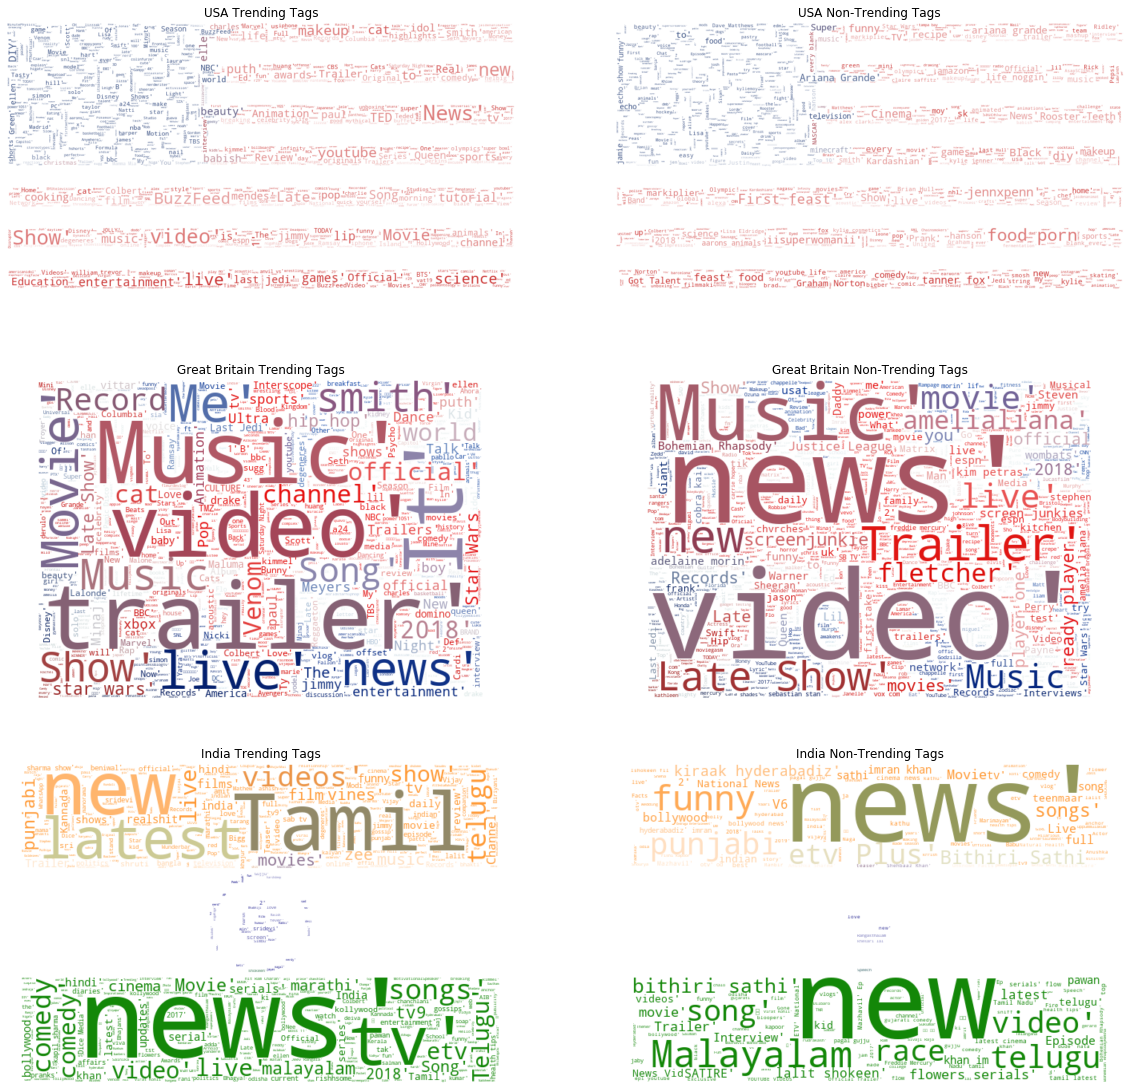

<Figure size 1440x1440 with 0 Axes>

In [9]:
## written by Aravind Patnam
script.do_wordcloud(us_trending_most_common_tags, gb_trending_most_common_tags, in_trending_most_common_tags, us_nontrending_most_common_tags, gb_nontrending_most_common_tags, in_nontrending_most_common_tags)

Below represents a sentiment analysis conducted on the youtube tags. A datset of positive words and negative words is provided for the model to work. 

In [10]:
## written by Aravind Patnam

## gets the classifications from the sentiment analysis and prints out accuracies of the model
classifications_us_trending = script.execute_model(list(us_trending_most_common_tags.keys()))
classifications_ca_trending = script.execute_model(list(ca_trending_most_common_tags.keys()))
classifications_de_trending = script.execute_model(list(de_trending_most_common_tags.keys()))
classifications_fr_trending = script.execute_model(list(fr_trending_most_common_tags.keys()))
classifications_gb_trending = script.execute_model(list(gb_trending_most_common_tags.keys()))
classifications_in_trending = script.execute_model(list(in_trending_most_common_tags.keys()))
classifications_jp_trending = script.execute_model(list(jp_trending_most_common_tags.keys()))
classifications_kr_trending = script.execute_model(list(kr_trending_most_common_tags.keys()))
classifications_mx_trending = script.execute_model(list(mx_trending_most_common_tags.keys()))
classifications_ru_trending = script.execute_model(list(ru_trending_most_common_tags.keys()))

classifications_us_nontrending = script.execute_model(list(us_nontrending_most_common_tags.keys()))
classifications_ca_nontrending = script.execute_model(list(ca_nontrending_most_common_tags.keys()))
classifications_de_nontrending = script.execute_model(list(de_nontrending_most_common_tags.keys()))
classifications_fr_nontrending = script.execute_model(list(fr_nontrending_most_common_tags.keys()))
classifications_gb_nontrending = script.execute_model(list(gb_nontrending_most_common_tags.keys()))
classifications_in_nontrending = script.execute_model(list(in_nontrending_most_common_tags.keys()))
classifications_jp_nontrending = script.execute_model(list(jp_nontrending_most_common_tags.keys()))
classifications_kr_nontrending = script.execute_model(list(kr_nontrending_most_common_tags.keys()))
classifications_mx_nontrending = script.execute_model(list(mx_nontrending_most_common_tags.keys()))
classifications_ru_nontrending = script.execute_model(list(ru_nontrending_most_common_tags.keys()))

Accuracy is: 0.8021668472372697
Accuracy is: 0.7817984832069339
Accuracy is: 0.7926327193932827
Accuracy is: 0.8036836403033586
Accuracy is: 0.7980498374864572
Accuracy is: 0.7893824485373782
Accuracy is: 0.7867822318526544
Accuracy is: 0.8043336944745395
Accuracy is: 0.7980498374864572
Accuracy is: 0.7995666305525461
Accuracy is: 0.7804983748645721
Accuracy is: 0.7828819068255688
Accuracy is: 0.8082340195016251
Accuracy is: 0.7872156013001084
Accuracy is: 0.7956663055254605
Accuracy is: 0.7878656554712893
Accuracy is: 0.7878656554712893
Accuracy is: 0.7919826652221018
Accuracy is: 0.8032502708559046
Accuracy is: 0.7954496208017334


In [11]:
## written by Aravind Patnam

## calls above method for stats for each country for visualization

country_us_trending, us_trending_pos, us_trending_neg = script.get_sentiment_stats(classifications_us_trending, "USA_Trending")
country_ca_trending, ca_trending_pos, ca_trending_neg = script.get_sentiment_stats(classifications_ca_trending, "Canada_Trending")
country_de_trending, de_trending_pos, de_trending_neg = script.get_sentiment_stats(classifications_de_trending, "Denmark_Trending")
country_fr_trending, fr_trending_pos, fr_trending_neg = script.get_sentiment_stats(classifications_fr_trending, "France_Trending")
country_gb_trending, gb_trending_pos, gb_trending_neg = script.get_sentiment_stats(classifications_gb_trending, "GreatBritain_Trending")
country_in_trending, in_trending_pos, in_trending_neg = script.get_sentiment_stats(classifications_in_trending, "India_Trending")
country_jp_trending, jp_trending_pos, jp_trending_neg = script.get_sentiment_stats(classifications_jp_trending, "Japan_Trending")
country_kr_trending, kr_trending_pos, kr_trending_neg = script.get_sentiment_stats(classifications_kr_trending, "SouthKorea_Trending")
country_mx_trending, mx_trending_pos, mx_trending_neg = script.get_sentiment_stats(classifications_mx_trending, "Mexico_Trending")
country_ru_trending, ru_trending_pos, ru_trending_neg = script.get_sentiment_stats(classifications_ru_trending, "Russia_Trending")


country_us_nontrending, us_nontrending_pos, us_nontrending_neg = script.get_sentiment_stats(classifications_us_nontrending, "USA_NonTrending")
country_ca_nontrending, ca_nontrending_pos, ca_nontrending_neg = script.get_sentiment_stats(classifications_ca_nontrending, "Canada_NonTrending")
country_de_nontrending, de_nontrending_pos, de_nontrending_neg = script.get_sentiment_stats(classifications_de_nontrending, "Denmark_NonTrending")
country_fr_nontrending, fr_nontrending_pos, fr_nontrending_neg = script.get_sentiment_stats(classifications_fr_nontrending, "France_NonTrending")
country_gb_nontrending, gb_nontrending_pos, gb_nontrending_neg = script.get_sentiment_stats(classifications_gb_nontrending, "GreatBritain_NonTrending")
country_in_nontrending, in_nontrending_pos, in_nontrending_neg = script.get_sentiment_stats(classifications_in_nontrending, "India_NonTrending")
country_jp_nontrending, jp_nontrending_pos, jp_nontrending_neg = script.get_sentiment_stats(classifications_jp_nontrending, "Japan_NonTrending")
country_kr_nontrending, kr_nontrending_pos, kr_nontrending_neg = script.get_sentiment_stats(classifications_kr_nontrending, "SouthKorea_NonTrending")
country_mx_nontrending, mx_nontrending_pos, mx_nontrending_neg = script.get_sentiment_stats(classifications_mx_nontrending, "Mexico_NonTrending")
country_ru_nontrending, ru_nontrending_pos, ru_nontrending_neg = script.get_sentiment_stats(classifications_ru_nontrending, "Russia_NonTrending")

countries = [country_us_trending, country_ca_trending, country_de_trending, country_fr_trending, country_gb_trending,
            country_in_trending, country_jp_trending, country_kr_trending, country_mx_trending, country_ru_trending,
            country_us_nontrending, country_ca_nontrending, country_de_nontrending, country_fr_nontrending, 
            country_gb_nontrending, country_in_nontrending, country_jp_nontrending, country_kr_nontrending, 
            country_mx_nontrending, country_ru_nontrending]
positivePercenteages = [us_trending_pos, ca_trending_pos, de_trending_pos, fr_trending_pos, gb_trending_pos, in_trending_pos, jp_trending_pos,
            kr_trending_pos, mx_trending_pos, ru_trending_pos, us_nontrending_pos, ca_nontrending_pos, de_nontrending_pos, fr_nontrending_pos,
            gb_nontrending_pos, in_nontrending_pos, jp_nontrending_pos, kr_nontrending_pos, mx_nontrending_pos, ru_nontrending_pos]
negativePercentages = [us_trending_neg, ca_trending_neg, de_trending_neg, fr_trending_neg, gb_trending_neg, in_trending_neg, jp_trending_neg, 
                      kr_trending_neg, mx_trending_neg, ru_trending_neg, us_nontrending_neg, ca_nontrending_neg, de_nontrending_neg, 
                      fr_nontrending_neg, gb_nontrending_neg, in_nontrending_neg, jp_nontrending_neg, kr_nontrending_neg, mx_nontrending_neg,
                      ru_nontrending_neg]
posToNegRatios = [i / j for i, j in zip(positivePercenteages, negativePercentages)] 
data_dict = {"Country" : countries, "Positives": positivePercenteages, "Negatives": negativePercentages, "PositiveNegativeRatio": posToNegRatios}
data = pd.DataFrame(data_dict, columns = ['Country', 'Positives' , 'Negatives', 'PositiveNegativeRatio'])

data

,Country,Positives,Negatives,PositiveNegativeRatio
0,USA_Trending,187,813,0.230012
1,Canada_Trending,247,753,0.328021
2,Denmark_Trending,174,826,0.210654
3,France_Trending,127,873,0.145475
4,GreatBritain_Trending,205,795,0.257862
5,India_Trending,294,706,0.416431
6,Japan_Trending,90,910,0.098901
7,SouthKorea_Trending,80,920,0.086957
8,Mexico_Trending,139,861,0.161440
9,Russia_Trending,123,877,0.140251


Hover over the plots and switch table to play with them and see what each one represents!! Use the toolbar to crop out some plots for better analysis. The first plot visualizes the ratios between the positive and negative tags while the second one shows the actual values that were classified as positive and negative by the sentiment analysis classifier. 

In [12]:
## written by Aravind Patnam
script.do_sentiment_analysis_visualization(data)

Loading BokehJS ...

Loading BokehJS ...

Hover and play around with the principle component analysis presented below. LDA topic model was used on youtube tags and descriptions to show these findings. The relevancy metric at the time of this submission is set to around 0.30 since it showed the most favorable results that were not too specific and not too generic. 

In [ ]:
## written by Aravind Patnam

## this will take a long time to run!

## visualize trending videos using pyLDAvis -> this might be only visible on nbviewer depending on your notebook viewing settings

full_trending_lda_input = list(script.get_most_common_tags(full_trending_df).keys()) + list (full_trending_df.sample(16901)['description'])
topics_Full_Trending, corpus, dictionary = script.do_LDA(full_trending_lda_input)
lda_display = script.visualize_LDA(True, corpus, dictionary)
pyLDAvis.display(lda_display)

In [ ]:
## written by Aravind Patnam

## this will take a long time to run!

## visualize nontrending videos using pyLDAvis -> this might be only visible on nbviewer depending on your notebook viewing settings


full_nontrending_lda_input = list(script.get_most_common_tags(full_nontrending_df).keys()) + list (full_nontrending_df['description'])
topics_Full_Nontrending, corpus, dictionary = script.do_LDA(full_nontrending_lda_input)
lda_display = script.visualize_LDA(True, corpus, dictionary)
pyLDAvis.display(lda_display)

In [ ]:
## written by Aravind Patnam

## this will take a long time to run!

## visualize all videos using pyLDAvis -> this might be only visible on nbviewer depending on your notebook viewing settings

allDfsDf_lda_input = list(script.get_most_common_tags(allDfsDf).keys()) + list (allDfsDf.sample(100000)['description'])
topics_all_dfs, corpus, dictionary = script.do_LDA(allDfsDf_lda_input)
lda_display = script.visualize_LDA(True, corpus, dictionary)
pyLDAvis.display(lda_display)

In [ ]:
## written by Aravind Patnam
## no need to run this as this has already been done for you
## convert to csvs

not_trending_us_df.to_csv('data/not_trending_us_df.csv')
not_trending_ca_df.to_csv('data/not_trending_ca_df.csv')
not_trending_de_df.to_csv('data/not_trending_de_df.csv')
not_trending_fr_df.to_csv('data/not_trending_fr_df.csv')
not_trending_gb_df.to_csv('data/not_trending_gb_df.csv')
not_trending_in_df.to_csv('data/not_trending_in_df.csv')
not_trending_jp_df.to_csv('data/not_trending_jp_df.csv')
not_trending_kr_df.to_csv('data/not_trending_kr_df.csv')
not_trending_mx_df.to_csv('data/not_trending_mx_df.csv')
not_trending_ru_df.to_csv('data/not_trending_ru_df.csv')

In [ ]:
# written by Jeremy Tan 
# How long did a video stay trending?
new = pd.DataFrame(full_trending_df_fill.groupby([full_trending_df_fill.index,'country']).count()['title'].sort_values(ascending=False)).reset_index()
new.head(), new.tail()
video_list,max_list = list(),list()
country_list = full_trending_df.groupby(['country']).count().index

bokeh.io.reset_output()
bokeh.io.output_notebook()

# gabs countries and grabs the times it appears in the dataframe
# print(country_list)
for c in country_list:
    video_list.append(new[new['country']==c]['title'].value_counts().sort_index())
    max_list.append(max(new[new['country']==c]['title'].value_counts().sort_index().index))
# print(video_list) 
# print(max_list)

# make line plots for the different countries (repeat another 9 times)
first_fig = figure(x_axis_type='linear',
             plot_height=300, plot_width=600,
             title='How long did a video stay trending?',
             x_axis_label='Conccurent Appearences (days)', y_axis_label=country_list[0],
             toolbar_location=None)

# plot for different countries (repeat another 9 times)
first_fig.line(x=video_list[0].index, y=video_list[0], 
         color='gray', line_width=1)

second_fig = figure(x_axis_type='linear',
             plot_height=300, plot_width=600,
             title='How long did a video stay trending?',
             x_axis_label='Conccurent Appearences (days)', y_axis_label=country_list[1],
             toolbar_location=None)

second_fig.line(x=video_list[1].index, y=video_list[1], 
         color='gray', line_width=1)

third_fig = figure(x_axis_type='linear',
             plot_height=300, plot_width=600,
             title='How long did a video stay trending?',
             x_axis_label='Conccurent Appearences (days)', y_axis_label=country_list[2],
             toolbar_location=None)

third_fig.line(x=video_list[2].index, y=video_list[2], 
         color='gray', line_width=1)


fourth_fig = figure(x_axis_type='linear',
             plot_height=300, plot_width=600,
             title='How long did a video stay trending?',
             x_axis_label='Conccurent Appearences (days)', y_axis_label=country_list[3],
             toolbar_location=None)

fourth_fig.line(x=video_list[3].index, y=video_list[3], 
         color='gray', line_width=1)

fifth_fig = figure(x_axis_type='linear',
             plot_height=300, plot_width=600,
             title='How long did a video stay trending?',
             x_axis_label='Conccurent Appearences (days)', y_axis_label=country_list[4],
             toolbar_location=None)

fifth_fig.line(x=video_list[4].index, y=video_list[4], 
         color='gray', line_width=1)

sixth_fig = figure(x_axis_type='linear',
             plot_height=300, plot_width=600,
             title='How long did a video stay trending?',
             x_axis_label='Conccurent Appearences (days)', y_axis_label=country_list[5],
             toolbar_location=None)

sixth_fig.line(x=video_list[5].index, y=video_list[5], 
         color='gray', line_width=1)


seventh_fig = figure(x_axis_type='linear',
             plot_height=300, plot_width=600,
             title='How long did a video stay trending?',
             x_axis_label='Conccurent Appearences (days)', y_axis_label=country_list[6],
             toolbar_location=None)

seventh_fig.line(x=video_list[6].index, y=video_list[6], 
         color='gray', line_width=1)

eight_fig = figure(x_axis_type='linear',
             plot_height=300, plot_width=600,
             title='How long did a video stay trending?',
             x_axis_label='Conccurent Appearences (days)', y_axis_label=country_list[7],
             toolbar_location=None)

eight_fig.line(x=video_list[7].index, y=video_list[7], 
         color='gray', line_width=1)

ninth_fig = figure(x_axis_type='linear',
             plot_height=300, plot_width=600,
             title='How long did a video stay trending?',
             x_axis_label='Conccurent Appearences (days)', y_axis_label=country_list[8],
             toolbar_location=None)

ninth_fig.line(x=video_list[8].index, y=video_list[8], 
         color='gray', line_width=1)

tenth_fig = figure(x_axis_type='linear',
             plot_height=300, plot_width=600,
             title='How long did a video stay trending?',
             x_axis_label='Conccurent Appearences (days)', y_axis_label=country_list[9],
             toolbar_location=None)

tenth_fig.line(x=video_list[9].index, y=video_list[9], 
         color='gray', line_width=1)

#Add panels for tabs 
first_panel = Panel(child=first_fig, title='Canada')
second_panel = Panel(child=second_fig, title='Germany')
third_panel = Panel(child=third_fig, title='France')
fourth_panel = Panel(child=fourth_fig, title='Great Britan')
fifth_panel = Panel(child=fifth_fig, title='India')
sixth_panel = Panel(child=sixth_fig, title='Japan')
seventh_panel = Panel(child=seventh_fig, title='Korea')
eighth_panel = Panel(child=eight_fig, title='Mexico')
ninth_panel = Panel(child=ninth_fig, title='Russia')
tenth_panel = Panel(child=tenth_fig, title='United States')


# Assign the panels to Tabs
tabs = Tabs(tabs=[first_panel, second_panel, third_panel, fourth_panel, fifth_panel, sixth_panel, seventh_panel, eighth_panel, ninth_panel, tenth_panel])
show(tabs)

As you can see from the visualization above, most trending videos only stay trending for two days or less. Some notable outliers are videos from Great Britan, which has videos that will stay trending for close to 30 days! For countries in the far East, videos only seem to stay tredning for one day so the turnover rate is pretty hight

In [ ]:
# Written by Jeremy Tan 
# Makes two new columns that count tilte length and description length
full_trending_df['title_length'] = full_trending_df['title'].str.len()
full_trending_df['description_length'] = full_trending_df['description'].str.len()

In [ ]:
# Written by Jeremy Tan
# What is the correlation between views, likes, disklies, and comment count 
full_trending_df = full_trending_df.rename(columns={'comment_count':'comments'})
# make a scatter matrix to visualzie correlations
fig = px.scatter_matrix(full_trending_df, dimensions=['views', 'likes', 'dislikes', 'comments', 'title_length', 'description_length'])
fig.update_traces(opacity=0.3, showupperhalf=False)
fig.update_layout(title = "Correlations", width = 900, height = 900)
fig.show()

As seen from the scatter matrix, there is a somewhat strong correlation between views and likes. Another correlation is between likes and comments, views and comments, and dislikes and comments (though somewhat weak!). Another interesting point is the length of the description and the length of the title seem to be tied together.

In [ ]:
# What is the correlation between views, likes, disklies, and comment count?
# Another interactive visualization 
corr = full_trending_df.loc[:, ['views', 'likes', 'dislikes', 'comments', 'description_length', 'title_length']].corr()
fig2 = go.Figure(data=go.Heatmap(
        z=corr.values,
        x=corr.index,
        y=corr.index,
        colorscale="Earth",
        zmin=-1,
        zmax=1
    # negative values
))
fig2.update_layout(title='Correlations between title, description, comments, dislikes, likes, and views')
fig2.show()

Another way to visualzie the correlations. Here, I can see additional correlations of dislikes and views, dislikes and likes, and dislikes and comments.

In [ ]:
# Written by Jeremy Tan
# What is the correlation between views, likes, disklies, and comment count in categories?
categories = full_trending_df['category'].unique()
interactions_corr_list = [full_trending_df[full_trending_df['category'] == cat].loc[:, ['views', 'likes', 'dislikes', 'comments', 'description_length', 'title_length']].corr() for cat in categories]
fig3 = go.Figure()
for idx, corr in enumerate(interactions_corr_list):
    if idx==0:
        fig3.add_trace(
            go.Heatmap(
                z=corr.values,
                x=corr.index,
                y=corr.index,
                colorscale="Earth",
                zmin=-1,
                zmax=1,
                visible=True))
    else:
         fig3.add_trace(
            go.Heatmap(
                z=corr.values,
                x=corr.index,
                y=corr.index,
                colorscale="Earth",
                zmin=-1,
                zmax=1,
                visible=False)) 

# Add buttons
fig3.update_layout(
    updatemenus=[
        go.layout.Updatemenu(
            active=0,
            x=0.8,
            y=1.2,
            buttons=list([
                dict(label=cat,
                     method="update",
                     # This comprehension list let visible the current trace only by setting itself to True and others to False
                     args=[{"visible": [False if sub_idx != idx else True for sub_idx, sub_cat in enumerate(categories)]},
                           {"title": "Correlation heatmap for category: " + cat}])
                for idx, cat in enumerate(categories)
            ] ) 
        )
    ])

Another way to visualize correlations but now based on categories. For the popular categories, the correlations I stated earlier hold true. However, if you were to go to a unpopular category like "trailers," negative correlations appear in place of the previous, strong correlations. Most suprisingly, for categories that elict human emotion, such as "Pet & Animals" and "Nonprofits & Activism" there is a strong correlation between likes, views, comments, and dislikes. 

In [ ]:
# Written by Jeremy Tan
# What category of videos trend the most in which countries?
# What category of videos fail to hit trending in which countries?
def trendingCategories(country, name):
    cat = country['category'].value_counts().reset_index()
    plt.figure(figsize=(7,5))
    sns.set_style("whitegrid")
    ax = sns.barplot(y=cat['index'],x=cat['category'], data=cat,orient='h')
    plt.xlabel("Number of Videos")
    plt.ylabel("Categories")
    plt.title("Most successful categories of trend videos in " + name)
    
def nontrendingCategories(country, name):
    cat = country['category'].value_counts().reset_index()
    plt.figure(figsize=(7,5))
    sns.set_style("whitegrid")
    ax = sns.barplot(y=cat['index'],x=cat['category'], data=cat,orient='h')
    plt.xlabel("Number of Videos")
    plt.ylabel("Categories")
    plt.title("Categories that fail to trend " + name)

In [ ]:
trendingCategories(US_trending_df, "United States")

In [ ]:
nontrendingCategories(not_trending_us_df, "United States")

Based on the two plot above, one can see "Entertainment" videos are the majority of videos made. They, however, have the highest chance to both fail and succeed. The pattern illuminates the more successful the category, the more videos that are being put out.  

In [ ]:
trendingCategories(CA_trending_df, "Canada")

In [ ]:
nontrendingCategories(not_trending_ca_df, "Canada")

The same pattern seems to appear as it did in the United States. However, "People and Blogs" and "Music" seem to fail more in this country.

In [ ]:
trendingCategories(DE_trending_df, "Germany")

In [ ]:
nontrendingCategories(not_trending_de_df, "Germany")

The same pattern seems to appear as it did in the United States. However, "People and Blogs" have more of a success rate but "Films & Animation" seem to fail more.

In [ ]:
trendingCategories(FR_trending_df, "France")

In [ ]:
nontrendingCategories(not_trending_fr_df, "France")

Same pattern occurs like in the Untied States. An interesting point is that "Peoples & Blog" have a higher probability of being trending. We can assume this is due to people valuing these type of videos more.

In [ ]:
trendingCategories(GB_trending_df, "Great Britan")

In [ ]:
nontrendingCategories(not_trending_gb_df, "Great Britan")

Same pattern occurs like in the Untied States. However, "Music" dominates this country with the majority of the videos being produced are of this category.

In [ ]:
trendingCategories(IN_trending_df, "India")

In [ ]:
nontrendingCategories(not_trending_in_df, "India")

Same pattern as the US. Nothing interesitng to note as it follows the pattern exactly where the more successful a category, the more likely the video will also fail.

In [ ]:
trendingCategories(JP_trending_df, "Japan")

In [ ]:
nontrendingCategories(not_trending_jp_df, "Japan")

Similar pattern as Germany, where "People and Blogs" videos will have a higher chance to be tredning and not fail.

In [ ]:
trendingCategories(KR_trending_df, "Korea")

In [ ]:
nontrendingCategories(not_trending_kr_df, "Korea")

Same pattern as the US.Interesting enough, this country cares alot about "News & Politics" and have lots of video that hit trending (only second behind "Entertainment"). 

In [ ]:
trendingCategories(MX_trending_df, "Mexico")

In [ ]:
nontrendingCategories(not_trending_mx_df, "Mexico")

Same pattern as the US. Similar stats as the US too. 

In [ ]:
trendingCategories(RU_trending_df, "Russia")

In [ ]:
nontrendingCategories(not_trending_ru_df, "Russia")

Same pattern as the US. However, like Germany and Japan, "Peoples & Blogs" have a high succes rate to reach trending and fail less.

In [ ]:
# Written by Jeremy Tan
# Which categories are the most popular? Do highest average amongst likes and views ----> shows which type of videos people enjoy the most
# makes a box plot to visuzlaize distbution of likes and views 
def likes_to_categories(country, name, log):
    country['likes_log'] = np.log(country['likes'] + 1)
    country['views_log'] = np.log(country['views'] + 1)
    country['dislikes_log'] = np.log(country['dislikes'] + 1)
    country['comment_log'] = np.log(country['comment_count'] + 1)
    plt.figure(figsize = (14,9))
    g1 = sns.boxplot(x='category', y=log, data=country, palette="Set1")
    g1.set_xticklabels(g1.get_xticklabels(),rotation=45,  fontsize=10)
    if "likes" in log:
        g1.set_title("Like Distribuition by Category in " + name, fontsize=20)
        g1.set_xlabel("", fontsize=15)
        g1.set_ylabel("Likes(log)", fontsize=15)
    else:
        g1.set_title("View Distribuition by Category in " + name, fontsize=20)
        g1.set_xlabel("", fontsize=15)
        g1.set_ylabel("Views(log)", fontsize=15)
    plt.show()

In [ ]:
likes_to_categories(US_trending_df, "United States", 'likes_log')

In [ ]:
likes_to_categories(US_trending_df, "United States", 'views_log')

Judging from the boxplot, it seems people in the US enjoy videos categorized Music more the most. Gaming is the second most popualr. Then, Entertainment. 

In [ ]:
likes_to_categories(CA_trending_df, "Canada", 'likes_log')

In [ ]:
likes_to_categories(CA_trending_df, "Canada", 'views_log')

It isn't as clear, but there seems to be a tie between Movies and Music as some of the more popular videos in Canada. Comedy lags behind third. 

In [ ]:
likes_to_categories(DE_trending_df, "Germany", 'likes_log')

In [ ]:
likes_to_categories(DE_trending_df, "Germany", 'views_log')

In Germany, Music is the most popular category. Movies trail right behind, and Comedy right after.

In [ ]:
likes_to_categories(FR_trending_df, "France", 'likes_log')

In [ ]:
likes_to_categories(FR_trending_df, "France", 'views_log')

In France, Music is the most popular category like Germany. However, Comedy and Entertainment trail right behind.

In [ ]:
likes_to_categories(GB_trending_df, "Great Britan", 'likes_log')

In [ ]:
likes_to_categories(GB_trending_df, "Great Britan", 'views_log')

Music is the most popular category, while Nonprfits & Activism then Entertainment trail behind.

In [ ]:
likes_to_categories(IN_trending_df, "India", 'likes_log')

In [ ]:
likes_to_categories(IN_trending_df, "India", 'views_log')

It isn't clear which videos come out on top, but based on likes, Pets & Animals, Gaming, and then Comedy are the top categories.

In [ ]:
likes_to_categories(JP_trending_df, "Japan", 'likes_log')

In [ ]:
likes_to_categories(JP_trending_df, "Japan", 'views_log')

Funny enough, Science & Technology are the most popular videos follwoed by Music and then Comedy.

In [ ]:
likes_to_categories(KR_trending_df, "Korea", 'likes_log')

In [ ]:
likes_to_categories(KR_trending_df, "Korea", 'views_log')

Similar to Japan, Science & Technology is first as Musis is second. However, Sports is third. 

In [ ]:
likes_to_categories(MX_trending_df, "Mexico", 'likes_log')

In [ ]:
likes_to_categories(MX_trending_df, "Mexico", 'views_log')

Music is first, Gaming is second, and Comedy is third.

In [ ]:
likes_to_categories(RU_trending_df, "Russia", 'likes_log')

In [ ]:
likes_to_categories(RU_trending_df, "Russia", 'views_log')

Music is first Science and Technology is second. Comedy is third. 

In [ ]:
# Written by Jeremy Tan
# Which channels are the most successfucl at reaching trending?
# Grabs most reoccuring videos in trending 
def videos_top(country, name):
    sns.set(font_scale=1.5,rc={'figure.figsize':(11.7,8.27)})
    tmp = country.channel_title.value_counts()[:25]    
    pop = sns.barplot(y=tmp.index,x=tmp)
    pop.set_title("Videos that consistently reach trending in " + name)
    pop.set_xlabel("Number of Appearences", fontsize=15)
    pop.set_ylabel("Channel Names", fontsize=15)

In [ ]:
videos_top(US_trending_df, "United States")

In [ ]:
videos_top(CA_trending_df, "Canada")

In [ ]:
videos_top(DE_trending_df, "Germany")

In [ ]:
videos_top(FR_trending_df, "France")

In [ ]:
videos_top(GB_trending_df, "Great Britan")

In [ ]:
videos_top(IN_trending_df, "India")

In [ ]:
videos_top(JP_trending_df, "Japan")

Original scrapper did not properly encode characters correctly. Hence the weird symbols.

In [ ]:
videos_top(KR_trending_df, "Korea")

Original scrapper did not properly encode characters correctly. Hence the weird symbols.

In [ ]:
videos_top(MX_trending_df, "Mexico")

In [ ]:
videos_top(RU_trending_df, "Russia")

Original scrapper did not properly encode characters correctly. Hence the weird symbols.

In [ ]:
# Written by Jeremy Tan
# prep data to by adding like rate and spliitng publish time into a hour, min, and sec column
full_trending_df['like_rate'] =  full_trending_df ['likes'] / full_trending_df['views'] * 100
full_trending_df[['hour','min','sec']] = full_trending_df['publish_time'].astype(str).str.split(':', expand=True).astype(int)
full_trending_df.head()

In [ ]:
# Written by Jeremy Tan
# When a video gets published, what is the intial like rate that got them to trending?
# Has two plots: one shows which hour a video is most commonly published and the other is a boxen plot that shows differnet quartiles of the like_rate + outliers

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('hour', data=full_trending_df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Hours Videos Are Published ", fontsize=20)
g.set_xlabel("Hours", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(212)
g1 = sns.lvplot(x='hour', y='like_rate', data=full_trending_df, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Like Rate by Hour", fontsize=20)
g1.set_xlabel("Hours", fontsize=15)
g1.set_ylabel("Like Rate(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

It seems most trending videos are published at 4 pm. However, more engagemnt in terms of like happens at 8pm.

In [ ]:
full_nontrending_df.head()

In [ ]:
# Written by Jeremy Tan 
# Grabs the videos that have the most views, likes, or dislikes
# What videos have the most views, likes, and dislikes in the tredning dataset and nontrending dataset?
def visualize_most(my_df, column, num=10): 
    # sort df by column
    sorted_df = my_df.sort_values(column, ascending=False).iloc[:num]
    # make a bar plot
    ax = sorted_df[column].plot.bar()

    # now add the video names 
    labels = []
    for item in sorted_df['title']:
        labels.append(item[:10] + " ...")
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    plt.show()

In [ ]:
visualize_most(full_trending_df, "views")

In [ ]:
visualize_most(full_nontrending_df, "views")

In [ ]:
visualize_most(full_trending_df, "likes")

In [ ]:
visualize_most(full_nontrending_df, "likes")

In [ ]:
visualize_most(full_trending_df, "dislikes")

In [ ]:
visualize_most(full_nontrending_df, "dislikes")

In [ ]:
# Written by Jeremy Tan
# Which country has the most active participation and engagemet?
to_int = ['views', 'likes', 'dislikes', 'comments']
for column in to_int:
    full_trending_df[column] = full_trending_df[column].astype(int)
    
measures = list()
n_groups = len(country_list)
for i, typ in enumerate(to_int):
    measure = list()
    for c in country_list:
        measure.append(full_trending_df[full_trending_df['country']==c][typ].agg('sum')/len(full_trending_df[full_trending_df['country']==c].index.unique()))
    measures.append(measure)

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(ncols=2,nrows=2, figsize=(15,10))

index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.4
error_config = {'ecolor': '0.3'}

for i, axs in enumerate([[ax1, ax2], [ax3, ax4]]):
    for j, ax in enumerate(axs):
        ax.bar(index + (bar_width), measures[(i+j)+i], bar_width*4,
                alpha=opacity, color=['b','y','g','r','k'],
                error_kw=error_config)
        ax.set_title(to_int[(i+j)+i])
        ax.set_xticks(index + bar_width / 2)
        ax.set_xticklabels(country_list)

# great britan seems to have the most engaging audience out of the 10 countries 

Overall, Great Britan has the most active audience with the US seriously lagging behind.